In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


In [2]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('../ff1') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 


In [3]:
# Load the session data
race = ff1.get_session(2021, 'Monza', 'R')

In [4]:
# Get the laps
laps = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['18', '55', '47', '3', '44', '31', '9', '10', '6', '63', '4', '16', '14', '5', '88', '11', '33', '22', '77', '99']


In [5]:
# Get laps of the drivers (BOT and HAM)
laps_ric = laps.pick_driver('RIC')
laps_ver = laps.pick_driver('VER')

In [8]:
# We are only analyzing stint 1, so select that one
laps_ric = laps_ric.loc[laps_ric['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]
laps_ric.dtypes

Time                  timedelta64[ns]
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
Compound                       object
TyreLife                      float64
FreshTyre                      object
LapStartTime          timedelta64[ns]
Team                           object
Driver                         object
TrackStatus                    object
IsAccurate                     object
LapStartDate           datetime64[ns]
dtype: objec

C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\timple\patches.py:91: FutureWarning: Conversion of the second argument of issubdtype from `'timedelta64'` to `np.signedinteger` is deprecated. In future, it will be treated as `np.timedelta64 == np.dtype('timedelta64').type`.
  and np.issubdtype(x.dtype, 'timedelta64')):
C:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\timple\patches.py:91: FutureWarning: Conversion of the second argument of issubdtype from `'timedelta64'` to `np.signedinteger` is deprecated. In future, it will be treated as `np.timedelta64 == np.dtype('timedelta64').type`.
  and np.issubdtype(x.dtype, 'timedelta64')):


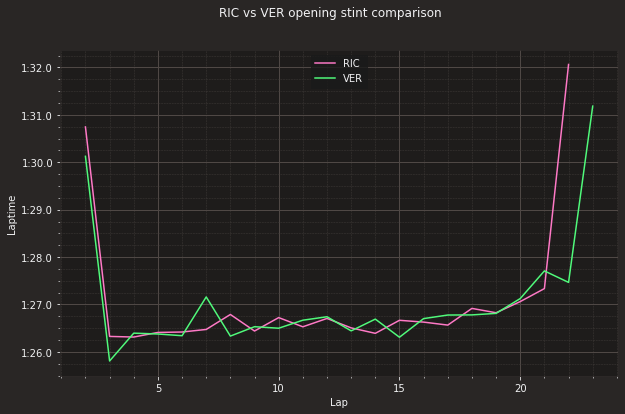

In [9]:

plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots()
fig.suptitle("RIC vs VER opening stint comparison")

ax.plot(laps_ric['LapNumber'], laps_ric['LapTime'], label='RIC')
ax.plot(laps_ver['LapNumber'], laps_ver['LapTime'], label='VER')
ax.set(ylabel='Laptime', xlabel='Lap')
ax.legend(loc="upper center")

# Hide x labels and tick labels for top plots and y ticks for right plots.

plt.show()